# Imports

In [21]:
import flopy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define Default Model Params 

In [22]:
# 1. Model parameters
modelname = 'groundwater_model'
workspace = './modflow_model'  # Directory to store model files
mf_version = 'mf2005'  # MODFLOW version to use
exe_name = r'C:\Users\ATREE\Code\MODFLOW\MF2005.1_12\bin\mf2005.exe'

# Create the MODFLOW model object
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, version=mf_version, model_ws=workspace)

# 2. Define the Spatial extent and discretization
nlay = 1  # Number of layers
nrow = 10  # Number of rows
ncol = 10  # Number of columns
delr = 10  # Cell width along rows (in meters)
delc = 10  # Cell width along columns (in meters)
top = 500  # Top elevation of the model layer (in meters)
botm = 250  # Bottom elevation of the model layer (in meters)

# 3. Define Time parameters
nper = 1  # Number of stress periods
perlen = [1]  # Length of stress periods (days)
nstp = [1]  # Number of time steps in each stress period
steady = [True]  # Steady-state or transient simulation

# Create the discretization object
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc, top=top, botm=botm, 
                               nper=nper, perlen=perlen, nstp=nstp, steady=steady)

# 4. Define Hydraulic properties
hk = 1e-5  # Hydraulic conductivity (m/s)
sy = 0.15  # Specific yield
ss = 1e-5  # Specific storage

# Create the layer property flow package
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, sy=sy, ss=ss)

# Save the model
mf.write_input()

# Print a message
print("Model setup complete. Input files are written to", workspace)

Model setup complete. Input files are written to ./modflow_model


# Boundary conditions and Sources/Sinks

In [23]:
# 5. Define boundary conditions 
# FloPy by default assumes no flow boundaries and constant head

# 6. Define Sources/Sinks: Adding a Recharge Package
rch_rate = 1e-4  # Recharge rate in meters per day (example value)
rch = flopy.modflow.ModflowRch(mf, rech=rch_rate)  # Create recharge package

# Save the model with the new packages added
mf.write_input()

# Print a message
print("Boundary conditions and sources/sinks added. Model updated.")

Boundary conditions and sources/sinks added. Model updated.


# River Params

In [24]:
# Assuming you have already created a MODFLOW model object 'mf'

# Define river parameters
# For simplicity, let's assume a single river cell at point A
river_stage = 305  # Stage (elevation) of the river (in meters)
river_cond = 1e-1  # Conductance of the river bed (in meters squared per day)
river_rbot = 300  # Bottom elevation of the river (in meters)

# Create a list of river cells
# (layer, row, column, stage, conductance, river bottom)
river_cells = [(0, 5, 5, river_stage, river_cond, river_rbot)]  # Example location

# Create the river package
riv = flopy.modflow.ModflowRiv(mf, stress_period_data={0: river_cells})

# Save the model
mf.write_input()

# Print a message
print("River package added. Model updated.")

initial_head = 400  # This value should be adjusted based on your knowledge of the area
bas = flopy.modflow.ModflowBas(mf, ibound=1, strt=initial_head)  # Create the basic package

# Save the model
mf.write_input()

# Print a message
print("Initial conditions added. Model updated.")

River package added. Model updated.
Initial conditions added. Model updated.


# Output Controls

In [25]:
# Create an Output Control package
oc = flopy.modflow.ModflowOc(mf, stress_period_data={(0, 0): ['save head', 'print budget']})

# Save the model with the new package added
mf.write_input()

# Print a message
print("Output control added. Model updated.")

Output control added. Model updated.


# Run Model

In [26]:
# Assuming you have already set up the model 'mf'

# Run the model
success, buff = mf.run_model()
if not success:
    raise Exception("MODFLOW did not terminate normally.")

FloPy is using the following executable to run the model: ..\..\..\MODFLOW\MF2005.1_12\bin\mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: groundwater_model.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/12/31 21:22:30

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2023/12/31 21:22:30
 Elapsed run time:  0.018 Seconds

  Normal termination of simulation


# Visualize Results

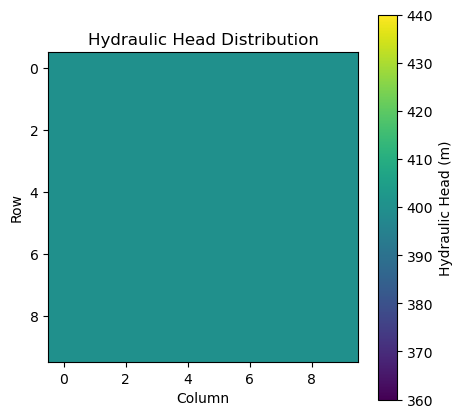

In [28]:
# Load the model results
headobj = flopy.utils.binaryfile.HeadFile(f'{workspace}/{modelname}.hds')
head = headobj.get_data(totim=headobj.get_times()[-1])

# Create a plot
plt.figure(figsize=(5, 5))

# Plot the hydraulic head
plt.imshow(head[0, :, :], interpolation='nearest', cmap='viridis')
plt.colorbar(label='Hydraulic Head (m)')
plt.title('Hydraulic Head Distribution')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()